# Health Insurance Lead Prediction

## Binomial Classification Problem

#### We have to predict whether a customer will be interested in recommended policy or not

In [350]:
## Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas_profiling
import os

In [351]:
# Setting the working directory 
os.chdir("C:\\Users\\Siddharth\\Desktop\\Job-a-thon\\Datasets")

### Importing the datasets

In [352]:
train = pd.read_csv("train_Df64byy.csv")

In [353]:
test = pd.read_csv("test_YCcRUnU.csv")

### Creating User Defined Functions

In [354]:
def cont_vars_summ(x):
    return pd.Series([x.isna().sum(),x.count(),x.mean(),x.min(),x.quantile(0.01),x.quantile(0.25),x.quantile(0.5),x.quantile(0.75),
                     x.quantile(0.99),x.max(),1 if (x.max()>x.quantile(0.99)) | (x.min()<x.quantile(0.01)) else 0]
                      ,index = ['Missing values','Count','Average','Minimum','1%','25%','50%','75%',
                                                       '99%','Maximum','Outlier Flag'])

In [355]:
def cat_vars_summ(x):
    Mode = x.value_counts().sort_values(ascending = False).iloc[0:1]
    return pd.Series([x.count(), x.isnull().sum(),Mode.index[0],Mode.values[0]], index = ['Count', 'Missing values','Mode','Freq'])

### Understanding the datasets

#### Train

In [356]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [357]:
train.tail()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1
50881,50882,C3,3866,Rented,Individual,24,24,No,X3,2.0,3.0,18,11424.0,0


In [358]:
train.Response

0        0
1        0
2        1
3        0
4        0
        ..
50877    0
50878    0
50879    0
50880    1
50881    0
Name: Response, Length: 50882, dtype: int64

In [359]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [360]:
## We can see that there are missing values

In [361]:
train.describe([0.01,0.99]).T

,count,mean,std,min,1%,50%,99%,max
ID,50882.0,25441.500000,14688.512535,1.0,509.81,25441.5,50373.19,50882.0
Region_Code,50882.0,1732.788707,1424.081652,1.0,8.00,1391.0,5492.19,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,19.00,44.0,75.00,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,18.00,40.0,75.00,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.00,3.0,4.00,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,1.00,17.0,22.00,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,3804.00,13178.0,33024.00,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.00,0.0,1.00,1.0


In [362]:
## We can also see that there are some outliers in the datatset

#### Test

In [363]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [364]:
test.tail()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0
21804,72687,C2,3617,Owned,Individual,73,73,No,X2,14+,2.0,3,23040.0


In [365]:
test.describe([0.01,0.99]).T

,count,mean,std,min,1%,50%,99%,max
ID,21805.0,61785.000000,6294.705646,50883.0,51101.04,61785.0,72468.960,72687.0
Region_Code,21805.0,1748.737491,1438.358949,1.0,8.00,1392.0,5498.960,6185.0
Upper_Age,21805.0,44.877734,17.254898,18.0,19.00,44.0,75.000,75.0
Lower_Age,21805.0,42.748085,17.269112,16.0,18.00,41.0,75.000,75.0
Holding_Policy_Type,13202.0,2.440085,1.037627,1.0,1.00,3.0,4.000,4.0
Reco_Policy_Cat,21805.0,15.138363,6.302805,1.0,1.00,17.0,22.000,22.0
Reco_Policy_Premium,21805.0,14220.306581,6497.996164,2152.0,3846.00,13244.0,32536.688,43776.0


In [366]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


### Feature Engineering

In [367]:
train["Mean_Age"] = (train.Upper_Age + train.Lower_Age)/2

In [368]:
test["Mean_Age"] = (test.Upper_Age + test.Lower_Age)/2

### Dividing the Dataset between categorical and continuous

In [369]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'Mean_Age'],
      dtype='object')

In [370]:
cont_vars = ['Upper_Age', 'Lower_Age','Reco_Policy_Premium','Mean_Age']

cat_vars = ['City_Code', 'Region_Code', 'Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator', 
            'Holding_Policy_Duration', 'Holding_Policy_Type','Reco_Policy_Cat', 'Response']

In [371]:
train_cont_vars = train[cont_vars]
train_cat_vars = train[cat_vars]

In [372]:
train_cont_vars.head()

,Upper_Age,Lower_Age,Reco_Policy_Premium,Mean_Age
0,36,36,11628.0,36.0
1,75,22,30510.0,48.5
2,32,32,7450.0,32.0
3,52,48,17780.0,50.0
4,44,44,10404.0,44.0


In [373]:
train_cat_vars.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Response
0,C3,3213,Rented,Individual,No,X1,14+,3.0,22,0
1,C5,1117,Owned,Joint,No,X2,NaN,NaN,22,0
2,C5,3732,Owned,Individual,No,NaN,1.0,1.0,19,1
3,C24,4378,Owned,Joint,No,X1,14+,3.0,19,0
4,C8,2190,Rented,Individual,No,X2,3.0,1.0,16,0


In [374]:
test_cont_vars = test[cont_vars]
test_cat_vars = test[cat_vars[:-1]]

In [375]:
test_cont_vars.head()

,Upper_Age,Lower_Age,Reco_Policy_Premium,Mean_Age
0,30,30,11934.0,30.0
1,69,68,32204.8,68.5
2,28,28,9240.0,28.0
3,23,23,9086.0,23.0
4,75,75,22534.0,75.0


In [376]:
test_cat_vars.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat
0,C1,156,Owned,Individual,No,NaN,6.0,3.0,5
1,C4,7,Owned,Joint,Yes,X1,3.0,3.0,18
2,C1,564,Rented,Individual,No,X3,2.0,4.0,17
3,C3,1177,Rented,Individual,No,X3,3.0,3.0,18
4,C1,951,Owned,Individual,No,X3,NaN,NaN,5


### Data Summary

In [377]:
train_cont_vars.apply(lambda x:cont_vars_summ(x)).round(2).T

,Missing values,Count,Average,Minimum,1%,25%,50%,75%,99%,Maximum,Outlier Flag
Upper_Age,0.0,50882.0,44.86,18.0,19.0,28.0,44.0,59.0,75.0,75.0,1.0
Lower_Age,0.0,50882.0,42.74,16.0,18.0,27.0,40.0,57.0,75.0,75.0,1.0
Reco_Policy_Premium,0.0,50882.0,14183.95,2280.0,3804.0,9248.0,13178.0,18096.0,33024.0,43350.4,1.0
Mean_Age,0.0,50882.0,43.80,17.5,19.0,28.0,42.0,58.0,75.0,75.0,1.0


In [378]:
train_cat_vars.apply(lambda x:cat_vars_summ(x)).T

,Count,Missing values,Mode,Freq
City_Code,50882,0,C1,8973
Region_Code,50882,0,1,96
Accomodation_Type,50882,0,Owned,27951
Reco_Insurance_Type,50882,0,Individual,40536
Is_Spouse,50882,0,No,42460
Health Indicator,39191,11691,X1,13010
Holding_Policy_Duration,30631,20251,1.0,4499
Holding_Policy_Type,30631,20251,3,13279
Reco_Policy_Cat,50882,0,22,6602
Response,50882,0,0,38673


In [379]:
test_cont_vars.apply(lambda x:cont_vars_summ(x)).round(2).T

,Missing values,Count,Average,Minimum,1%,25%,50%,75%,99%,Maximum,Outlier Flag
Upper_Age,0.0,21805.0,44.88,18.0,19.0,28.0,44.0,59.0,75.00,75.0,1.0
Lower_Age,0.0,21805.0,42.75,16.0,18.0,27.0,41.0,57.0,75.00,75.0,1.0
Reco_Policy_Premium,0.0,21805.0,14220.31,2152.0,3846.0,9285.0,13244.0,18201.6,32536.69,43776.0,1.0
Mean_Age,0.0,21805.0,43.81,18.0,19.0,28.0,42.0,58.0,75.00,75.0,1.0


In [380]:
test_cat_vars.apply(lambda x:cat_vars_summ(x)).T

,Count,Missing values,Mode,Freq
City_Code,21805,0,C1,3789
Region_Code,21805,0,1,44
Accomodation_Type,21805,0,Owned,12090
Reco_Insurance_Type,21805,0,Individual,17341
Is_Spouse,21805,0,No,18227
Health Indicator,16778,5027,X1,5614
Holding_Policy_Duration,13202,8603,14+,1892
Holding_Policy_Type,13202,8603,3,5572
Reco_Policy_Cat,21805,0,22,2857


### Outlier Treatment

In [381]:
# Capping the outlier at 99 and 1 percentile

In [382]:
train_cont_vars = train_cont_vars.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [383]:
train_cont_vars.apply(lambda x:cont_vars_summ(x)).T

,Missing values,Count,Average,Minimum,1%,25%,50%,75%,99%,Maximum,Outlier Flag
Upper_Age,0.0,50882.0,44.858555,19.0,19.0,28.0,44.0,59.0,75.0,75.0,0.0
Lower_Age,0.0,50882.0,42.754039,18.0,18.0,27.0,40.0,57.0,75.0,75.0,0.0
Reco_Policy_Premium,0.0,50882.0,14163.642954,3804.0,3804.0,9248.0,13178.0,18096.0,33024.0,33024.0,0.0
Mean_Age,0.0,50882.0,43.799939,19.0,19.0,28.0,42.0,58.0,75.0,75.0,0.0


In [384]:
test_cont_vars = test_cont_vars.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [385]:
test_cont_vars.apply(lambda x:cont_vars_summ(x)).T

,Missing values,Count,Average,Minimum,1%,25%,50%,75%,99%,Maximum,Outlier Flag
Upper_Age,0.0,21805.0,44.880394,19.0,19.0,28.0,44.0,59.0,75.00000,75.000,0.0
Lower_Age,0.0,21805.0,42.761568,18.0,18.0,27.0,41.0,57.0,75.00000,75.000,0.0
Reco_Policy_Premium,0.0,21805.0,14199.205617,3846.0,3846.0,9285.0,13244.0,18201.6,32535.42848,32536.688,1.0
Mean_Age,0.0,21805.0,43.815639,19.0,19.0,28.0,42.0,58.0,75.00000,75.000,0.0


In [386]:
# The outliers have been treated

### Missing Value Treatment

In [387]:
train_cat_vars = train_cat_vars.apply(lambda x:x.fillna(x.mode()[0]))

In [388]:
train_cat_vars.apply(lambda x:cat_vars_summ(x)).T

,Count,Missing values,Mode,Freq
City_Code,50882,0,C1,8973
Region_Code,50882,0,1,96
Accomodation_Type,50882,0,Owned,27951
Reco_Insurance_Type,50882,0,Individual,40536
Is_Spouse,50882,0,No,42460
Health Indicator,50882,0,X1,24701
Holding_Policy_Duration,50882,0,1.0,24750
Holding_Policy_Type,50882,0,3,33530
Reco_Policy_Cat,50882,0,22,6602
Response,50882,0,0,38673


In [389]:
test_cat_vars = test_cat_vars.apply(lambda x:x.fillna(x.mode()[0]))

In [390]:
test_cat_vars.apply(lambda x:cat_vars_summ(x)).T

,Count,Missing values,Mode,Freq
City_Code,21805,0,C1,3789
Region_Code,21805,0,1,44
Accomodation_Type,21805,0,Owned,12090
Reco_Insurance_Type,21805,0,Individual,17341
Is_Spouse,21805,0,No,18227
Health Indicator,21805,0,X1,10641
Holding_Policy_Duration,21805,0,14+,10495
Holding_Policy_Type,21805,0,3,14175
Reco_Policy_Cat,21805,0,22,2857


### Creating Dummy Variables

In [391]:
train_cat_vars.nunique()

City_Code                    36
Region_Code                5316
Accomodation_Type             2
Reco_Insurance_Type           2
Is_Spouse                     2
Health Indicator              9
Holding_Policy_Duration      15
Holding_Policy_Type           4
Reco_Policy_Cat              22
Response                      2
dtype: int64

In [392]:
train_cat_vars = pd.get_dummies(train_cat_vars,columns = ['City_Code', 'Accomodation_Type','Reco_Insurance_Type', 'Is_Spouse', 
                                         'Health Indicator','Holding_Policy_Duration', 'Holding_Policy_Type', 
                                         'Reco_Policy_Cat'],drop_first = True)

In [393]:
train_cat_vars.head()

,Region_Code,Response,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,3213,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3732,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4378,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2190,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [394]:
test_cat_vars = pd.get_dummies(test_cat_vars,columns = ['City_Code', 'Accomodation_Type','Reco_Insurance_Type', 'Is_Spouse', 
                                         'Health Indicator','Holding_Policy_Duration', 'Holding_Policy_Type', 
                                         'Reco_Policy_Cat'],drop_first = True)

In [395]:
test_cat_vars.head()

,Region_Code,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,156,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,564,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1177,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,951,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Final Train and Test Datasets

In [396]:
train_final = pd.concat([train_cont_vars,train_cat_vars],axis = 1)
train_final.head()

,Upper_Age,Lower_Age,Reco_Policy_Premium,Mean_Age,Region_Code,Response,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,36,36,11628.0,36.0,3213,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,75,22,30510.0,48.5,1117,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,32,32,7450.0,32.0,3732,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,52,48,17780.0,50.0,4378,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,44,44,10404.0,44.0,2190,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [397]:
train_final.shape

(50882, 90)

In [490]:
test_final = pd.concat([test_cont_vars,test_cat_vars],axis = 1)
test_final.head()

,Upper_Age,Lower_Age,Reco_Policy_Premium,Mean_Age,Region_Code,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,30,30,11934.0,30.0,156,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,69,68,32204.8,68.5,7,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,28,28,9240.0,28.0,564,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,23,23,9086.0,23.0,1177,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,75,75,22534.0,75.0,951,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [400]:
test_final.shape

(21805, 89)

### Trying Upsampling

In [331]:
from sklearn.utils import resample

In [332]:
train_final.Response.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [333]:
# Separate majority and minority classes
df_majority = train_final[train_final.Response==0]
df_minority = train_final[train_final.Response==1]

In [334]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=38673,    # to match majority class
                                 random_state=123) # reproducible results

In [481]:
# Combine majority class with upsampled minority class
train_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
train_upsampled.Response.value_counts()

1    38673
0    38673
Name: Response, dtype: int64

### Changing the names of columns for VIF

In [496]:
column_indices = [range(44,69)]
new_names = ['Health_Indicator_X2', 'Health_Indicator_X3',
       'Health_Indicator_X4', 'Health_Indicator_X5',
       'Health_Indicator_X6', 'Health_Indicator_X7',
       'Health_Indicator_X8', 'Health_Indicator_X9',
       'Holding_Policy_Duration_10', 'Holding_Policy_Duration_11',
       'Holding_Policy_Duration_12', 'Holding_Policy_Duration_13',
       'Holding_Policy_Duration_14plus', 'Holding_Policy_Duration_14',
       'Holding_Policy_Duration_2', 'Holding_Policy_Duration_3',
       'Holding_Policy_Duration_4', 'Holding_Policy_Duration_5',
       'Holding_Policy_Duration_6', 'Holding_Policy_Duration_7',
       'Holding_Policy_Duration_8', 'Holding_Policy_Duration_9',
       'Holding_Policy_Type_2', 'Holding_Policy_Type_3',
       'Holding_Policy_Type_4']
old_names = train_upsampled.columns[column_indices]
train_upsampled.rename(columns=dict(zip(old_names, new_names)), inplace=True)

C:\Users\Siddharth\anaconda3\lib\site-packages\pandas\core\indexes\base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [497]:
column_indices = [range(43,68)]
new_names = ['Health_Indicator_X2', 'Health_Indicator_X3',
       'Health_Indicator_X4', 'Health_Indicator_X5',
       'Health_Indicator_X6', 'Health_Indicator_X7',
       'Health_Indicator_X8', 'Health_Indicator_X9',
       'Holding_Policy_Duration_10', 'Holding_Policy_Duration_11',
       'Holding_Policy_Duration_12', 'Holding_Policy_Duration_13',
       'Holding_Policy_Duration_14plus', 'Holding_Policy_Duration_14',
       'Holding_Policy_Duration_2', 'Holding_Policy_Duration_3',
       'Holding_Policy_Duration_4', 'Holding_Policy_Duration_5',
       'Holding_Policy_Duration_6', 'Holding_Policy_Duration_7',
       'Holding_Policy_Duration_8', 'Holding_Policy_Duration_9',
       'Holding_Policy_Type_2', 'Holding_Policy_Type_3',
       'Holding_Policy_Type_4']
old_names = test_final.columns[column_indices]
test_final.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [498]:
train_upsampled.shape

(77346, 90)

In [499]:
test_final.shape

(21805, 89)

### Variance Inflation Factor (Multicollinearity Check)

In [500]:
train_upsampled.columns

Index(['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium', 'Mean_Age',
       'Region_Code', 'Response', 'City_Code_C10', 'City_Code_C11',
       'City_Code_C12', 'City_Code_C13', 'City_Code_C14', 'City_Code_C15',
       'City_Code_C16', 'City_Code_C17', 'City_Code_C18', 'City_Code_C19',
       'City_Code_C2', 'City_Code_C20', 'City_Code_C21', 'City_Code_C22',
       'City_Code_C23', 'City_Code_C24', 'City_Code_C25', 'City_Code_C26',
       'City_Code_C27', 'City_Code_C28', 'City_Code_C29', 'City_Code_C3',
       'City_Code_C30', 'City_Code_C31', 'City_Code_C32', 'City_Code_C33',
       'City_Code_C34', 'City_Code_C35', 'City_Code_C36', 'City_Code_C4',
       'City_Code_C5', 'City_Code_C6', 'City_Code_C7', 'City_Code_C8',
       'City_Code_C9', 'Accomodation_Type_Rented', 'Reco_Insurance_Type_Joint',
       'Is_Spouse_Yes', 'Health_Indicator_X2', 'Health_Indicator_X3',
       'Health_Indicator_X4', 'Health_Indicator_X5', 'Health_Indicator_X6',
       'Health_Indicator_X7', 'Health_Indicat

In [501]:
feature_columns = train_upsampled.columns.difference(['Response'])
feature_columns

Index(['Accomodation_Type_Rented', 'City_Code_C10', 'City_Code_C11',
       'City_Code_C12', 'City_Code_C13', 'City_Code_C14', 'City_Code_C15',
       'City_Code_C16', 'City_Code_C17', 'City_Code_C18', 'City_Code_C19',
       'City_Code_C2', 'City_Code_C20', 'City_Code_C21', 'City_Code_C22',
       'City_Code_C23', 'City_Code_C24', 'City_Code_C25', 'City_Code_C26',
       'City_Code_C27', 'City_Code_C28', 'City_Code_C29', 'City_Code_C3',
       'City_Code_C30', 'City_Code_C31', 'City_Code_C32', 'City_Code_C33',
       'City_Code_C34', 'City_Code_C35', 'City_Code_C36', 'City_Code_C4',
       'City_Code_C5', 'City_Code_C6', 'City_Code_C7', 'City_Code_C8',
       'City_Code_C9', 'Health_Indicator_X2', 'Health_Indicator_X3',
       'Health_Indicator_X4', 'Health_Indicator_X5', 'Health_Indicator_X6',
       'Health_Indicator_X7', 'Health_Indicator_X8', 'Health_Indicator_X9',
       'Holding_Policy_Duration_10', 'Holding_Policy_Duration_11',
       'Holding_Policy_Duration_12', 'Holding_Poli

In [502]:
model_param = 'Response ~ ' + ' + '.join(feature_columns)

In [505]:
# Removing Lower_Age and Upper_Age due to multicollinearity
model_param = '''Response ~ Accomodation_Type_Rented + City_Code_C10 + City_Code_C11 + City_Code_C12 + City_Code_C13 + City_Code_C14 + City_Code_C15 + City_Code_C16 + City_Code_C17 + City_Code_C18 + City_Code_C19 + City_Code_C2 + City_Code_C20 + City_Code_C21 + City_Code_C22 + City_Code_C23 + City_Code_C24 + City_Code_C25 + City_Code_C26 + City_Code_C27 + City_Code_C28 + City_Code_C29 + City_Code_C3 + City_Code_C30 + City_Code_C31 + City_Code_C32 + City_Code_C33 + City_Code_C34 + City_Code_C35 + City_Code_C36 + City_Code_C4 + City_Code_C5 + City_Code_C6 + City_Code_C7 + City_Code_C8 + City_Code_C9 + Health_Indicator_X2 + Health_Indicator_X3 + Health_Indicator_X4 + Health_Indicator_X5 + Health_Indicator_X6 + Health_Indicator_X7 + Health_Indicator_X8 + Health_Indicator_X9 + Holding_Policy_Duration_10 + Holding_Policy_Duration_11 + Holding_Policy_Duration_12 + Holding_Policy_Duration_13 + Holding_Policy_Duration_14 + Holding_Policy_Duration_14plus + Holding_Policy_Duration_2 + Holding_Policy_Duration_3 + Holding_Policy_Duration_4 + Holding_Policy_Duration_5 + Holding_Policy_Duration_6 + Holding_Policy_Duration_7 + Holding_Policy_Duration_8 + Holding_Policy_Duration_9 + Holding_Policy_Type_2 + Holding_Policy_Type_3 + Holding_Policy_Type_4 + Is_Spouse_Yes + Mean_Age + Reco_Insurance_Type_Joint + Reco_Policy_Cat_10 + Reco_Policy_Cat_11 + Reco_Policy_Cat_12 + Reco_Policy_Cat_13 + Reco_Policy_Cat_14 + Reco_Policy_Cat_15 + Reco_Policy_Cat_16 + Reco_Policy_Cat_17 + Reco_Policy_Cat_18 + Reco_Policy_Cat_19 + Reco_Policy_Cat_2 + Reco_Policy_Cat_20 + Reco_Policy_Cat_21 + Reco_Policy_Cat_22 + Reco_Policy_Cat_3 + Reco_Policy_Cat_4 + Reco_Policy_Cat_5 + Reco_Policy_Cat_6 + Reco_Policy_Cat_7 + Reco_Policy_Cat_8 + Reco_Policy_Cat_9 + Reco_Policy_Premium + Region_Code'''

In [506]:
# High VIF of the variable means information in that variable has already been explained by 
# other X variables present in the model

# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# separate the Y and X variables
y, X = dmatrices( model_param, train_upsampled, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif.sort_values('VIF Factor',ascending = False).head(25)

,Features,VIF Factor
0,Intercept,74.930375
64,Reco_Insurance_Type_Joint,6.907775
78,Reco_Policy_Cat_22,6.240548
86,Reco_Policy_Premium,5.432789
73,Reco_Policy_Cat_18,5.069028
62,Is_Spouse_Yes,4.629964
77,Reco_Policy_Cat_21,4.573089
72,Reco_Policy_Cat_17,4.079724
63,Mean_Age,3.984043
71,Reco_Policy_Cat_16,3.983231


In [510]:
train_upsampled.drop(columns = ['Lower_Age','Upper_Age'],inplace = True)
test_final.drop(columns = ['Lower_Age','Upper_Age'],inplace = True)

KeyError: "['Lower_Age' 'Upper_Age'] not found in axis"

In [511]:
train_upsampled.shape

(77346, 88)

In [512]:
test_final.shape

(21805, 87)

### Training and Testing Split

In [513]:
from sklearn.model_selection import train_test_split

In [514]:
train_X, test_X, train_y, test_y = train_test_split( (train_upsampled.drop(columns = 'Response')),
                                                  train_upsampled['Response'],
                                                  test_size = 0.3,
                                                  random_state = 28 )

In [515]:
print('No of obs in training: ', len(train_X), ' | ', 'No of obs in testing: ', len(test_X))

No of obs in training:  54142  |  No of obs in testing:  23204


### Model Building

### Logistics Regression

In [516]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0).fit(train_X, train_y)

#### Accuracy Checks

In [517]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [518]:
train_gini = 2*metrics.roc_auc_score(train_y, log_model.predict(train_X)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_y, log_model.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.001880790164231927
The Gini Index for the model built on the Test Data is :  -0.006637252750481881


In [519]:
print('Train accuracy',log_model.score(train_X, train_y))
print('Test accuracy',log_model.score(test_X, test_y))

Train accuracy 0.5000184699493924
Test accuracy 0.4987933114980176


#### Confusion Matrix

In [617]:
logm_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': log_model.predict( train_X ) } )

In [618]:
logm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': log_model.predict( test_X ) } )

In [623]:
tn, fp, fn, tp = metrics.confusion_matrix( logm_train_pred.actual,logm_train_pred.predicted).ravel()

Text(0.5, 26.0, 'Predicted label')

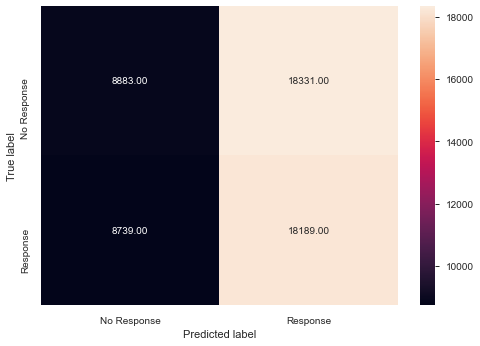

In [620]:
log_cm_train = metrics.confusion_matrix( logm_train_pred.actual,
                                 logm_train_pred.predicted)
sns.heatmap(log_cm_train, annot=True,
         fmt='.2f',
         xticklabels = ["No Response", "Response"] , yticklabels = ["No Response", "Response"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [626]:
# For train
Sens_train = tp/(tp+fn)
Spec_train = tn/(tn+fp)
print("The Senstivity for train is :",Sens_train)
print("The Specificity for train is :",Spec_train)

The Senstivity for train is : 0.6754679144385026
The Specificity for train is : 0.3264128757257294


### Random Forest

In [523]:
from sklearn.ensemble import RandomForestClassifier

In [524]:
radm_reg = RandomForestClassifier()
radm_reg.fit( train_X, train_y )

RandomForestClassifier()

In [525]:
radm_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': radm_reg.predict( train_X ) } )


In [526]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_reg.predict( test_X ) } )


In [527]:
train_gini = 2*metrics.roc_auc_score(train_y, radm_reg.predict(train_X)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_y, radm_reg.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.9998158807630253
The Gini Index for the model built on the Test Data is :  0.7857227970035952


Text(0.5, 26.0, 'Predicted label')

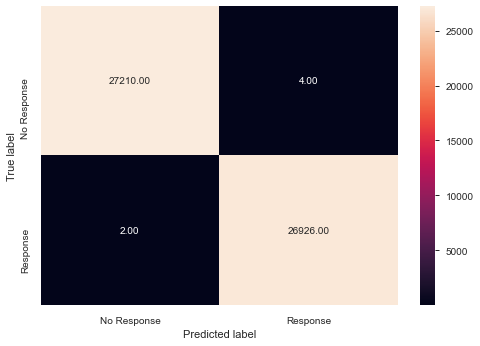

In [605]:
rdf_cm_train = metrics.confusion_matrix( radm_train_pred.actual,
                                 radm_train_pred.predicted)
sns.heatmap(rdf_cm_train, annot=True,
         fmt='.2f',
         xticklabels = ["No Response", "Response"] , yticklabels = ["No Response", "Response"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 26.0, 'Predicted label')

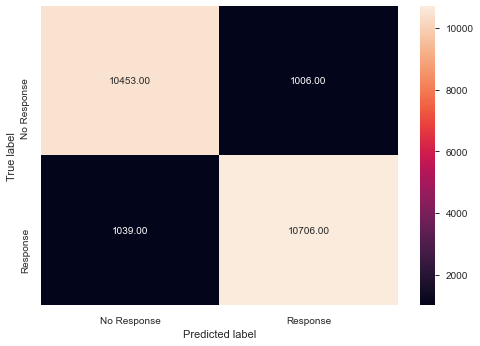

In [607]:
radm_cm_test = metrics.confusion_matrix( radm_test_pred.actual,
                                 radm_test_pred.predicted)
sns.heatmap(radm_cm_test, annot=True,
         fmt='.2f',
         xticklabels = ["No Response", "Response"] , yticklabels = ["No Response", "Response"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

#### Finding the ideal cutoff

In [533]:
radm_test_pred_prob = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_reg.predict_proba(test_X)[:,1]  } )
radm_test_pred_prob.head()

,actual,predicted
17581,0,0.50
6443,0,0.52
30131,1,0.93
4026,1,0.97
19758,0,0.46


In [534]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()

for cut_off in np.linspace(0,1,50):
    radm_test_pred_prob['predicted_value'] = radm_test_pred_prob['predicted'].apply(lambda x: 0 if x < cut_off else 1)
    radm_test_pred_prob['tp'] = radm_test_pred_prob.apply(lambda x: 1 if x['actual']==1 and x['predicted_value']==1 else 0, axis=1)
    radm_test_pred_prob['fp'] = radm_test_pred_prob.apply(lambda x: 1 if x['actual']==0 and x['predicted_value']==1 else 0, axis=1)
    radm_test_pred_prob['tn'] = radm_test_pred_prob.apply(lambda x: 1 if x['actual']==0 and x['predicted_value']==0 else 0, axis=1)
    radm_test_pred_prob['fn'] = radm_test_pred_prob.apply(lambda x: 1 if x['actual']==1 and x['predicted_value']==0 else 0, axis=1)
    sensitivity = radm_test_pred_prob['tp'].sum() / (radm_test_pred_prob['tp'].sum() + radm_test_pred_prob['fn'].sum())
    specificity = radm_test_pred_prob['tn'].sum() / (radm_test_pred_prob['tn'].sum() + radm_test_pred_prob['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

radm_test_pred_prob.sum()

actual             11745.000000
predicted          13627.321065
predicted_value     1221.000000
tp                  1221.000000
fp                     0.000000
tn                 11459.000000
fn                 10524.000000
dtype: float64

In [535]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [536]:
roc_like_df

,cutoff,sensitivity,specificity,total
0,0.000000,1.000000,0.000000,1.000000
0,0.020408,0.999915,0.007680,1.007594
0,0.040816,0.999830,0.019635,1.019465
0,0.061224,0.998382,0.035692,1.034075
0,0.081633,0.997786,0.055502,1.053289
0,0.102041,0.996850,0.081770,1.078620
0,0.122449,0.994891,0.116851,1.111743
0,0.142857,0.993785,0.154638,1.148423
0,0.163265,0.991741,0.192512,1.184254
0,0.183673,0.990634,0.236495,1.227130


0.551020

In [627]:
radm_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'prob': radm_reg.predict_proba(train_X)[:,1] } )
radm_train_pred['predicted'] = radm_train_pred['prob'].apply(lambda x: 1 if x > 0.551020 else 0)

In [628]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'prob': radm_reg.predict_proba(test_X)[:,1] } )
radm_test_pred['predicted'] = radm_test_pred['prob'].apply(lambda x: 1 if x > 0.551020 else 0)

Text(0.5, 26.0, 'Predicted label')

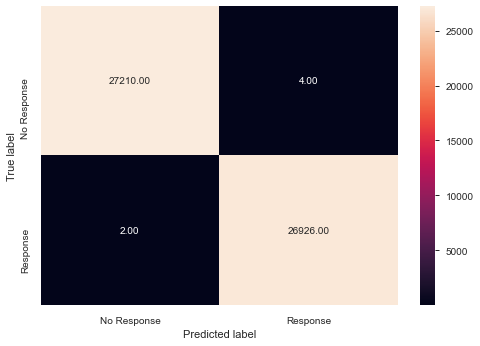

In [652]:
rdf_cm_train = metrics.confusion_matrix( radm_train_pred.actual,
                                 radm_train_pred.predicted)
sns.heatmap(rdf_cm_train, annot=True,
         fmt='.2f',
         xticklabels = ["No Response","Response"] , yticklabels = ["No Response","Response"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [630]:
tn, fp, fn, tp =  metrics.confusion_matrix( radm_train_pred.actual,radm_train_pred.predicted).ravel()

In [631]:
# For train
Sens_train = tp/(tp+fn)
Spec_train = tn/(tn+fp)
print("The Senstivity for train is :",Sens_train)
print("The Specificity for train is :",Spec_train)

The Senstivity for train is : 0.9999257278669044
The Specificity for train is : 0.9998530168295731


Text(0.5, 26.0, 'Predicted label')

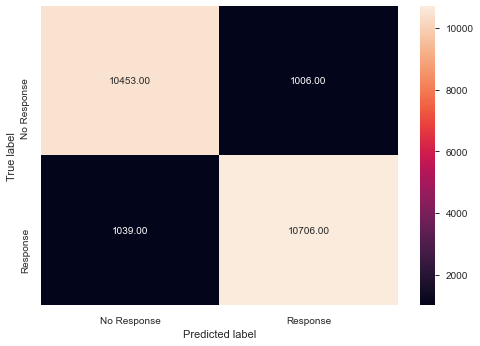

In [651]:
radm_cm_test = metrics.confusion_matrix( radm_test_pred.actual,
                                 radm_test_pred.predicted)
sns.heatmap(radm_cm_test, annot=True,
         fmt='.2f',
         xticklabels = ["No Response","Response"] , yticklabels = ["No Response","Response"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [634]:
tn, fp, fn, tp =  metrics.confusion_matrix( radm_test_pred.actual,radm_test_pred.predicted).ravel()

In [635]:
# For test
Sens_test = tp/(tp+fn)
Spec_test = tn/(tn+fp)
print("The Senstivity for train is :",Sens_test)
print("The Specificity for train is :",Spec_test)

The Senstivity for train is : 0.9115368241805023
The Specificity for train is : 0.9122087442185182


### KNN

In [549]:
from sklearn.model_selection import GridSearchCV

In [547]:
from sklearn.neighbors import KNeighborsClassifier

In [550]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11,13]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5)
knn_clf.fit(train_X,train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7, 9, 11, 13]}])

In [551]:
knn_clf.best_params_

{'n_neighbors': 3}

In [552]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(train_X,train_y )

KNeighborsClassifier(n_neighbors=3)

In [554]:
train_X

,Reco_Policy_Premium,Mean_Age,Region_Code,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
33412,9104.0,43.0,308,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45809,5224.0,24.0,1939,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21125,16172.0,59.0,70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23694,22458.8,63.0,1435,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8020,13948.0,51.0,3101,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17012,9600.0,45.0,2975,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9455,5224.0,23.0,112,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32719,9212.0,37.0,1403,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
42553,5224.0,21.0,2798,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [555]:
train_gini = 2*metrics.roc_auc_score(train_y, knn_clf.predict(train_X)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_y, knn_clf.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.7162894278752141
The Gini Index for the model built on the Test Data is :  0.389989378906588


### XGBoost

In [559]:
from xgboost import XGBClassifier

In [560]:
pargrid_adaxg = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [584]:
xgb_clf = XGBClassifier(learning_rate = 1,n_estimators = 1000) 
xgb_clf.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [585]:
train_gini = 2*metrics.roc_auc_score(train_y, xgb_clf.predict(train_X)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_y, xgb_clf.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.9998158807630253
The Gini Index for the model built on the Test Data is :  0.7264217354626641


In [649]:
xgb_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': xgb_clf.predict( train_X ) } )


In [646]:
xgb_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': xgb_clf.predict(test_X) } )


Text(0.5, 26.0, 'Predicted label')

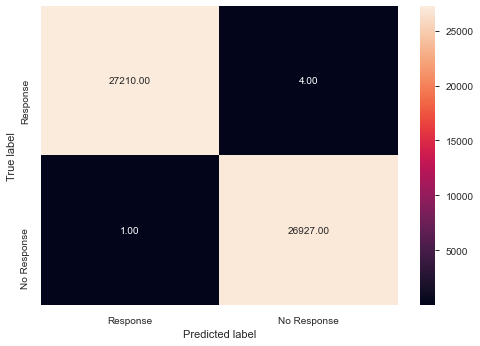

In [650]:
log_cm_train = metrics.confusion_matrix( xgb_train_pred.actual,
                                 xgb_train_pred.predicted)
sns.heatmap(log_cm_train, annot=True,
         fmt='.2f',
         xticklabels = ['Response', "No Response"] , yticklabels = ['Response', "No Response"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 26.0, 'Predicted label')

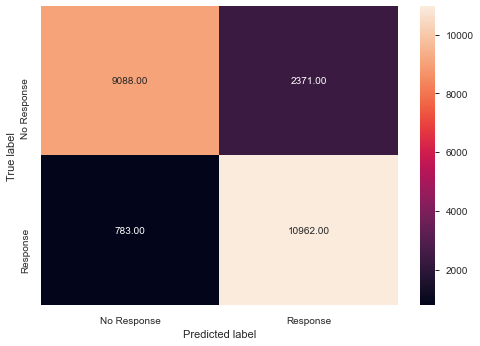

In [648]:
log_cm_test = metrics.confusion_matrix( xgb_test_pred.actual,
                                 xgb_test_pred.predicted)
sns.heatmap(log_cm_test, annot=True,
         fmt='.2f',
         xticklabels = ["No Response","Response"] , yticklabels = ["No Response","Response"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [593]:
xgb_test_pred_prob = pd.DataFrame( { 'actual':  test_y,
                            'predicted': xgb_clf.predict_proba(test_X)[:,1]  } )
xgb_test_pred_prob.head()

,actual,predicted
17581,0,0.858203
6443,0,0.394662
30131,1,0.982841
4026,1,0.985542
19758,0,0.839977


In [594]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()

for cut_off in np.linspace(0,1,50):
    xgb_test_pred_prob['predicted_value'] = xgb_test_pred_prob['predicted'].apply(lambda x: 0 if x < cut_off else 1)
    xgb_test_pred_prob['tp'] = xgb_test_pred_prob.apply(lambda x: 1 if x['actual']==1 and x['predicted_value']==1 else 0, axis=1)
    xgb_test_pred_prob['fp'] = xgb_test_pred_prob.apply(lambda x: 1 if x['actual']==0 and x['predicted_value']==1 else 0, axis=1)
    xgb_test_pred_prob['tn'] = xgb_test_pred_prob.apply(lambda x: 1 if x['actual']==0 and x['predicted_value']==0 else 0, axis=1)
    xgb_test_pred_prob['fn'] = xgb_test_pred_prob.apply(lambda x: 1 if x['actual']==1 and x['predicted_value']==0 else 0, axis=1)
    sensitivity = xgb_test_pred_prob['tp'].sum() / (xgb_test_pred_prob['tp'].sum() + xgb_test_pred_prob['fn'].sum())
    specificity = xgb_test_pred_prob['tn'].sum() / (xgb_test_pred_prob['tn'].sum() + xgb_test_pred_prob['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

xgb_test_pred_prob.sum()

actual             11745.000000
predicted          13243.241937
predicted_value        0.000000
tp                     0.000000
fp                     0.000000
tn                 11459.000000
fn                 11745.000000
dtype: float64

In [595]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [596]:
roc_like_df

,cutoff,sensitivity,specificity,total
0,0.000000,1.000000,0.000000,1.000000
0,0.020408,0.977011,0.393053,1.370065
0,0.040816,0.971477,0.471245,1.442723
0,0.061224,0.966880,0.520813,1.487693
0,0.081633,0.962537,0.559124,1.521661
0,0.102041,0.960238,0.588446,1.548684
0,0.122449,0.958450,0.610263,1.568713
0,0.142857,0.956322,0.629811,1.586132
0,0.163265,0.954278,0.646741,1.601019
0,0.183673,0.952576,0.659656,1.612232


In [637]:
xgb_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'prob': xgb_clf.predict_proba(train_X)[:,1] } )
xgb_train_pred['predicted'] = xgb_train_pred['prob'].apply(lambda x: 1 if x > 0.836735 else 0)

In [638]:
xgb_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'prob':  xgb_clf.predict_proba(test_X)[:,1] } )
xgb_test_pred['predicted'] = xgb_test_pred['prob'].apply(lambda x: 1 if x > 0.836735 else 0)

Text(0.5, 26.0, 'Predicted label')

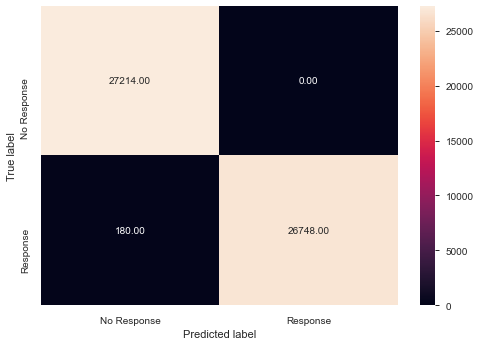

In [639]:
log_cm_train = metrics.confusion_matrix( xgb_train_pred.actual,
                                 xgb_train_pred.predicted)
sns.heatmap(log_cm_train, annot=True,
         fmt='.2f',
         xticklabels = ["No Response","Response"] , yticklabels = ["No Response","Response"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [640]:
tn, fp, fn, tp =  metrics.confusion_matrix( xgb_train_pred.actual,xgb_train_pred.predicted).ravel()

In [641]:
# For train
Sens_train = tp/(tp+fn)
Spec_train = tn/(tn+fp)
print("The Senstivity for train is :",Sens_train)
print("The Specificity for train is :",Spec_train)

The Senstivity for train is : 0.9933155080213903
The Specificity for train is : 1.0


Text(0.5, 26.0, 'Predicted label')

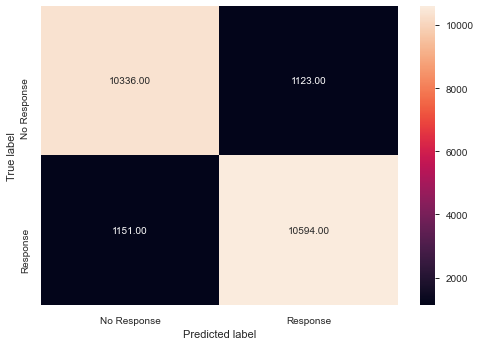

In [642]:
log_cm_test = metrics.confusion_matrix( xgb_test_pred.actual,
                                 xgb_test_pred.predicted)
sns.heatmap(log_cm_test, annot=True,
         fmt='.2f',
         xticklabels = ["No Response","Response"] , yticklabels = ["No Response","Response"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [643]:
tn, fp, fn, tp =  metrics.confusion_matrix( xgb_test_pred.actual,xgb_test_pred.predicted).ravel()

In [644]:
# For train
Sens_test = tp/(tp+fn)
Spec_test = tn/(tn+fp)
print("The Senstivity for train is :",Sens_test)
print("The Specificity for train is :",Spec_test)

The Senstivity for train is : 0.9020008514261387
The Specificity for train is : 0.9019984291823021


### Adaboost

In [657]:
from sklearn.model_selection import RandomizedSearchCV

In [658]:
# define search space
space = dict()
space['learning_rate'] = [0.1,1,10]
space[ 'n_estimators'] = [400,600,800]

In [659]:
gscv_ada = AdaBoostClassifier()

In [662]:
search_ada = RandomizedSearchCV(gscv_ada, space, n_jobs=-1, cv=5, random_state=1)

In [663]:
# execute search
result_ada = search_ada.fit(train_X, train_y)


C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


NameError: name 'result' is not defined

In [664]:
# summarize result
print('Best Score: %s' % result_ada.best_score_)
print('Best Hyperparameters: %s' % result_ada.best_params_)

Best Score: 0.5842046591021394
Best Hyperparameters: {'n_estimators': 400, 'learning_rate': 1}


In [667]:
gscv_ada = AdaBoostClassifier(learning_rate=1, n_estimators=400)
gscv_ada.fit(train_X, train_y)

AdaBoostClassifier(learning_rate=1, n_estimators=400)

In [668]:
train_gini = 2*metrics.roc_auc_score(train_y, gscv_ada.predict(train_X)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_y, gscv_ada.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.17909893312313785
The Gini Index for the model built on the Test Data is :  0.17444851507722348


### SVM

In [669]:
from sklearn.svm import SVC

In [670]:
from sklearn.model_selection import RandomizedSearchCV

In [671]:
# define search space
space = dict()
space['C'] = [1,10,100]
space['gamma'] = [10,1,0.1]

In [672]:
grid = SVC()

In [673]:
search = RandomizedSearchCV(grid, space, cv=3, random_state=1)

In [ ]:
# execute search
result_svm = search.fit(train_X, train_y)

C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
